<a href="https://colab.research.google.com/github/Rohit0994/Netflix-Movies-and-TV-Shows-Clustering---Unsupervised/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - Netflix Movies and TV Shows Clustering

#### **Project Type**    - **Unsupervised**
#### **Contribution**    - **Individual**
#### **Name** - **Rohit Sharma**

# **GitHub Link -**
##### https://github.com/Rohit0994/Netflix-Movies-and-TV-Shows-Clustering---Unsupervised

# **Problem Description**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b> Data Description </b>

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##Business Problem

####The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

####(i). Importing the libraries

In [ ]:
#Importing important libraries and modules

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

# plotly.graph_objects as go provides an automatically-generated hierarchy of classes called "graph objects" that may be used to represent figures
import plotly.graph_objects as go

# plotly.offline as py Simple way of using python plotly graphs offline
import plotly.offline as py

#plotly.express as px contains functions that can create entire figures at once
import plotly.express as px
from datetime import datetime

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading CSV FILE
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project csv files/Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


####(ii).Understanding the data

In [ ]:
# Top 5 Rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Checking the shape of the dataframe
df.shape
#total 7787 Observation and 12 Coulums/Features

(7787, 12)

In [ ]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

There are 12 columns

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here we can see there is a Null/Missing values in some columns like director, cast, country, date_added, rating in dataset and all the features are containing numerical values.

# Data Wrangling

####Checking for duplicate records

In [ ]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

There are no duplicated values

###Handling Null values

In [ ]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [ ]:
#Handling Null Values

df['director'] = df['director'].fillna('Unknown')
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


'''The [0] at the end of the mode() method is used to extract the FIRST
(and in this case, only) element of this series, which is the most frequent value of the 'rating' column.'''

"The [0] at the end of the mode() method is used to extract the FIRST\n(and in this case, only) element of this series, which is the most frequent value of the 'rating' column."

In [ ]:
df.dropna(axis=0, inplace = True)  # to drop the date_added rows who contains null values

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

1. The missing values in the director attributes can be replaced with 'Unknown'.
2. The missing values in the cast attributes can be replaced with 'No cast'.
2. 10 records with missing values in the date_added column can be dropped.
3. The missing values in country and rating can be imputed with its mode, since this attribute is discrete.

In [ ]:
df.shape

(7777, 12)

###Unique values in each column

In [ ]:
# unique values in each column
df.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

##Exploratory Data Analysis - EDA

## **1.Type** [Movie /TV Shows]

In [ ]:
# Movie and TV Shows counts
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

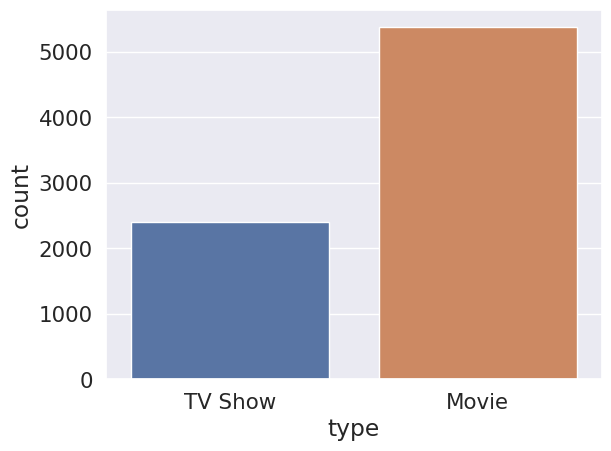

In [ ]:
# Countplot to visualize the number of movies and tv_shows in type column
sns.countplot(data=df, x='type')

Netflix has 5377 movies and 2400 TV shows,
There are more numbers of movies (69.14%) than TV shows (30.86%) in the dataset.



## **2. Ratings**

In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7777, dtype: object

In [ ]:
#Assigning the Ratings into grouped categories
# We have defined 4 categories in rating column and created new column for this
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

#we are creating new column target_ages based on rating


In [ ]:
# type and target_ages should be a categorical columns
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


In [ ]:
# Creating two dataframes for tv_shows and movies
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
print(tv_shows.shape)
print(movies.shape)

(2400, 13)
(5377, 13)


#### a. Ratings of TV SHOWS

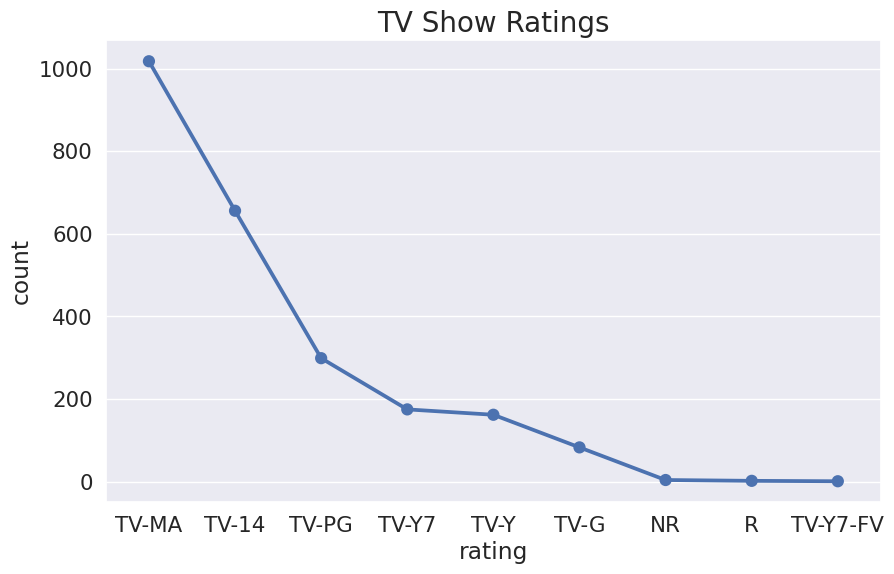

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

#### TV-MA has the highest number of ratings for tv shows i,e Adult ratings.

### b. Movie ratings by target ages

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

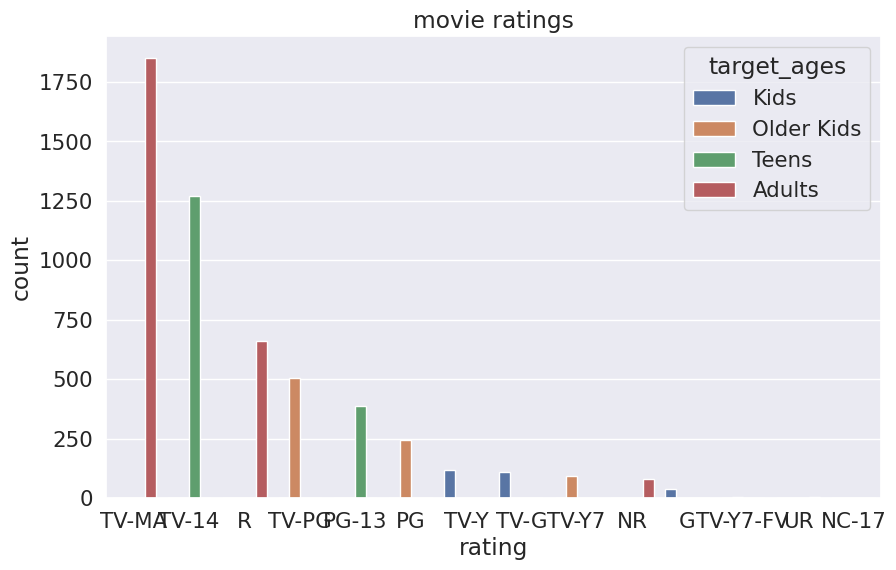

In [ ]:
# Movie Ratings based on Target Age Groups
plt.figure(figsize=(10,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

####1.TV-MA has the highest number of ratings for Movies

####2.Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## **3.Release_year**

In [ ]:
# In which year number of movies release
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)


In [ ]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    744
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [ ]:
# In which year number of TV shows release
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    157
2014     90
2013     64
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

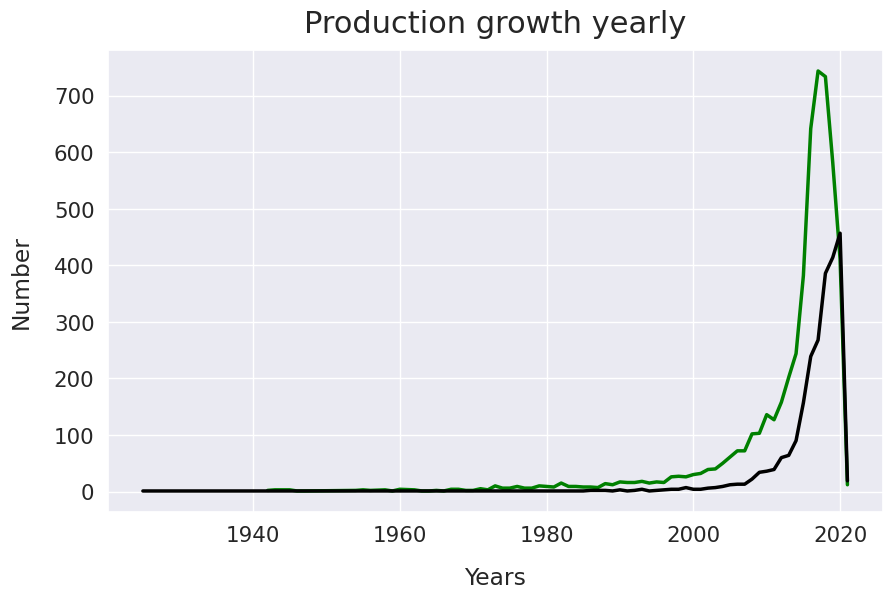

In [ ]:
# visualizing the production growth of movies and TV shows over time.
sns.set(font_scale=1.4)
movies_year.plot(figsize=(10, 6), linewidth=2.5, color='green',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(10, 6), linewidth=2.5, color='black',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

#there is a significant drop in the number of movies and television episodes produced after 2020

### We can see that over the past year Movies are leading if we compare to TV shows but near 2015-2020 Tv shows are giving equal compitition to MOvies.

<Axes: xlabel='release_year', ylabel='count'>

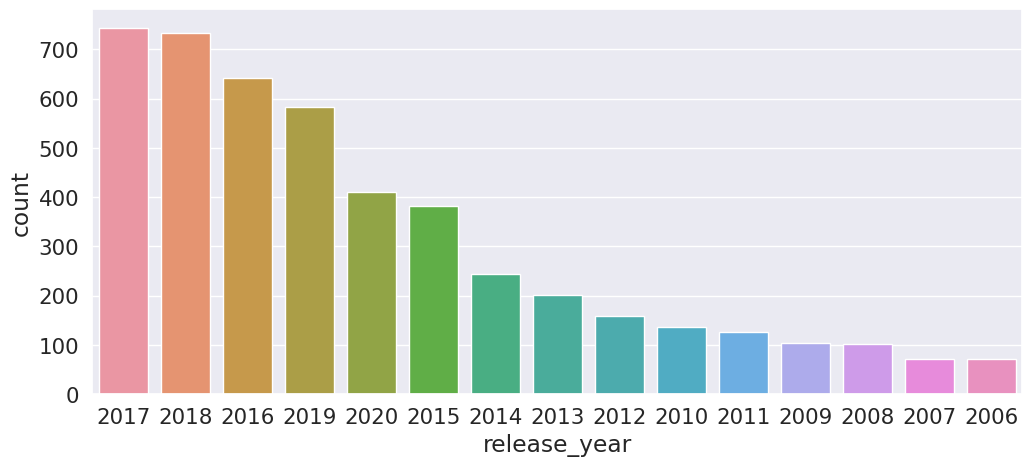

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(12,5))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:15])


<Axes: xlabel='release_year', ylabel='count'>

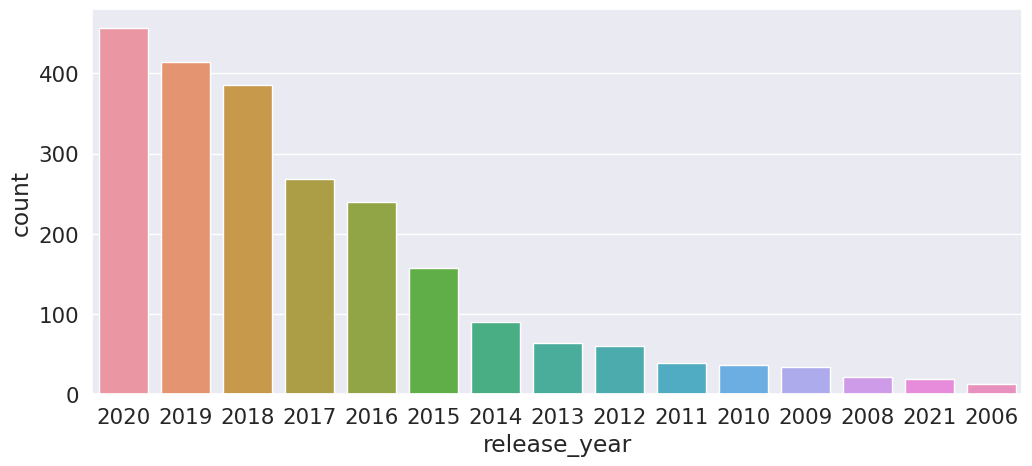

In [ ]:
#Analysing how many tv shows released per year in last 15 years
plt.figure(figsize=(12,5))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:15])



*  highest number of movies released in 2017 and 2018
*   highest number of Tv Shows released in 2020
*  The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   We saw a huge increase in the number of movies and television episodes after 2015.
*    there is a significant drop in the number of Tv Shows/Movies after 2020(in year 2021), maybe due to covid.





In [ ]:
df1=df.copy()

In [ ]:
#Adding new columns of month from date_added

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


##**4.Release_month**

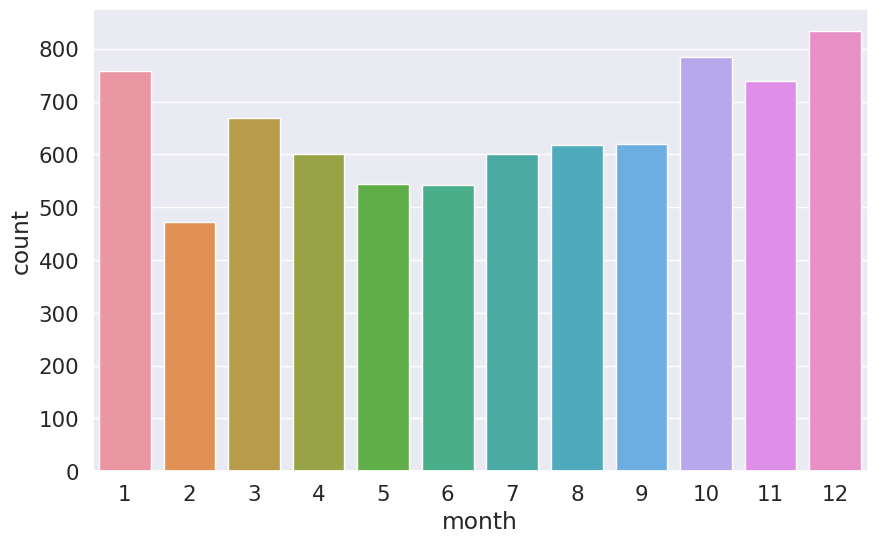

In [ ]:
# Plotting the Countplot for Monthwise added Movies/tv shows on netflix
plt.figure(figsize=(10,6))
ax=sns.countplot(data= df, x='month')

From October to January, maximum number of movies and TV shows were added on netflix


<Axes: xlabel='month', ylabel='count'>

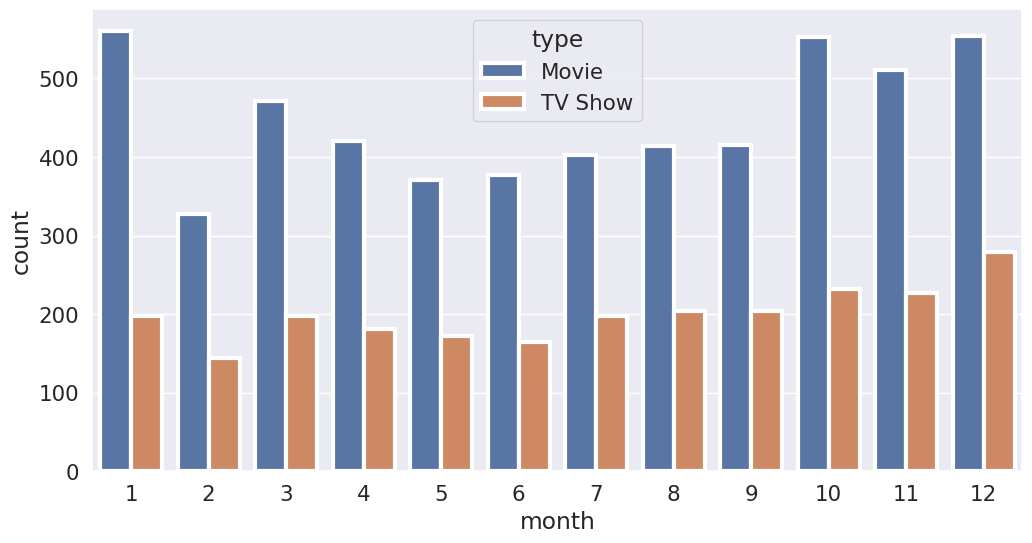

In [ ]:
# Movies and TV Shows MOnth wise added
fig, ax = plt.subplots(figsize=(12,6))

sns.countplot(x='month', hue='type',lw=3, data=df, ax=ax)

The above graph shows that the most content is added to Netflix from october to january which mostly are Movies in numbers.

## **5.Genre**

<Axes: title={'center': 'Top-6 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

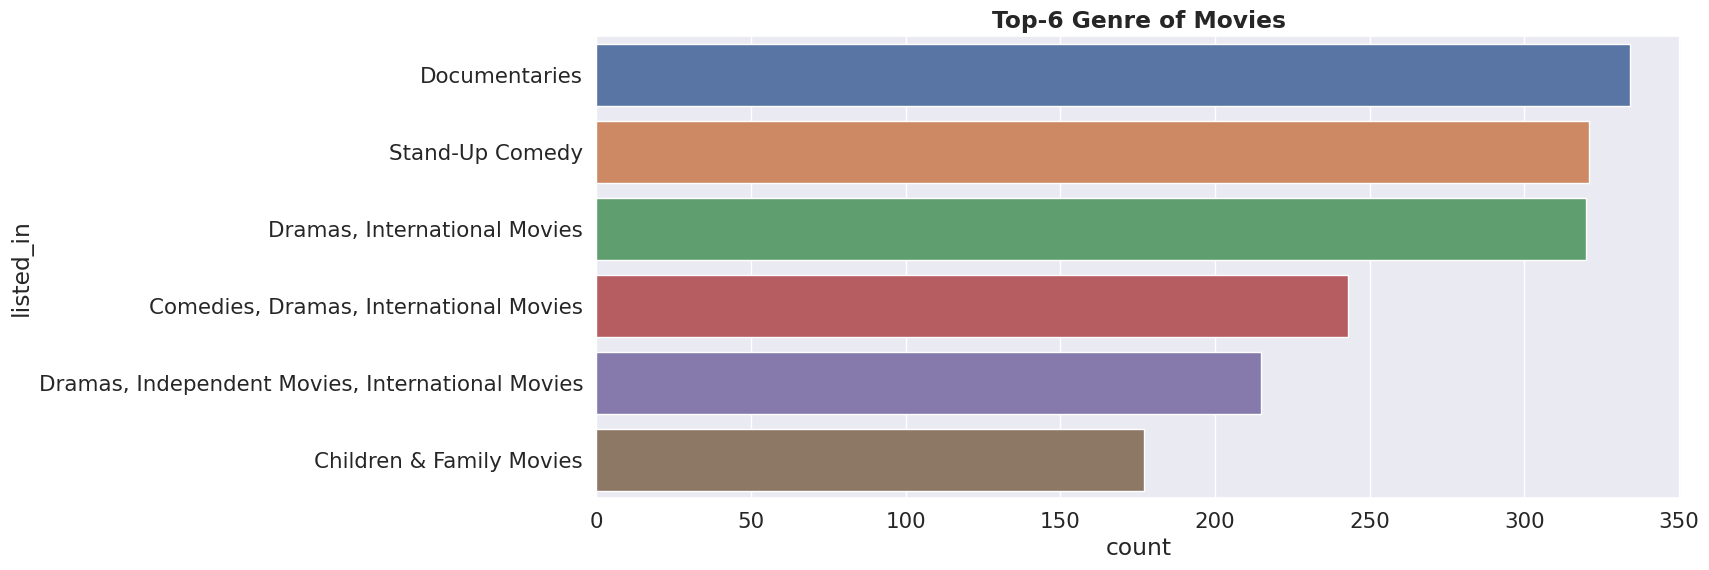

In [ ]:
#Analysing top 6 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top-6 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:6])

Documentaries are the top most Movie genre in netflix followed by standup comedy and Drams and international movies

<Axes: title={'center': 'Top-6 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

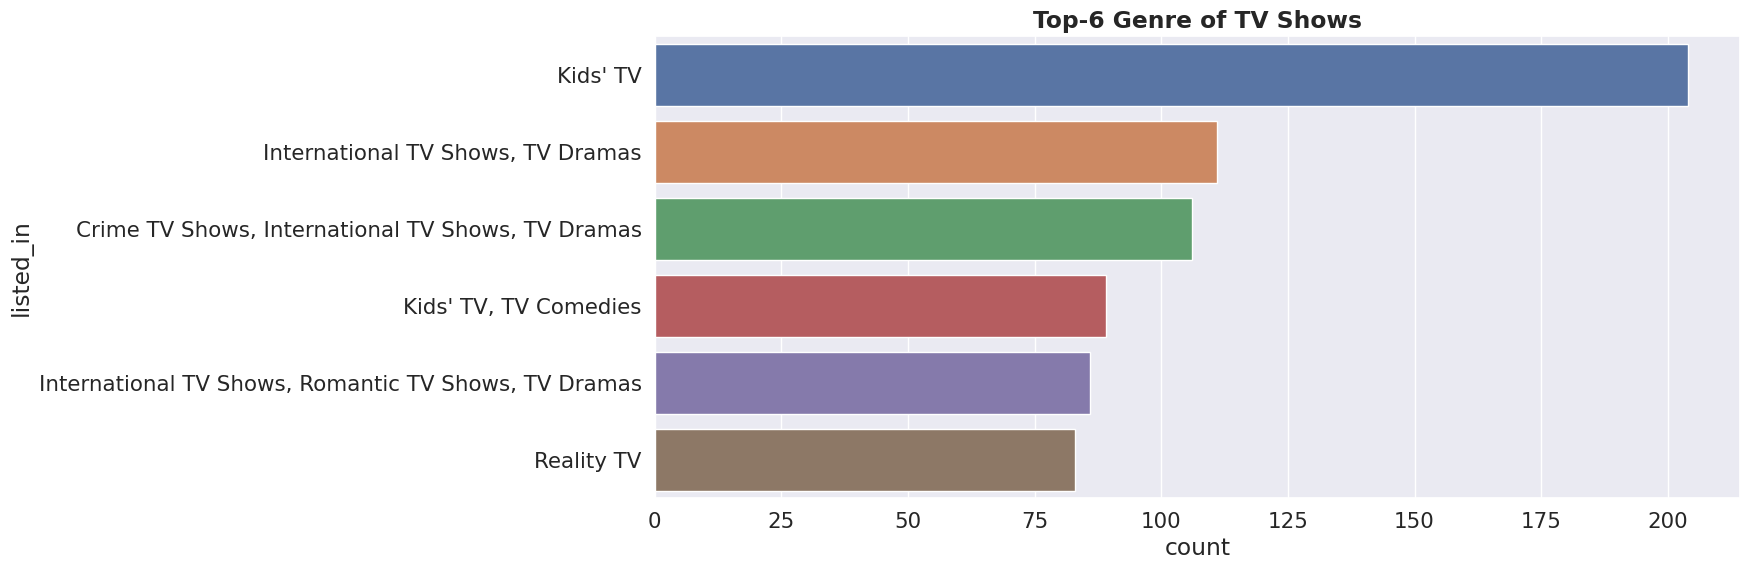

In [ ]:
#Analysing top 6 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top-6 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:6])

kids tv is the top most  TV show genre in netflix

## **6.Duration/Runtime**

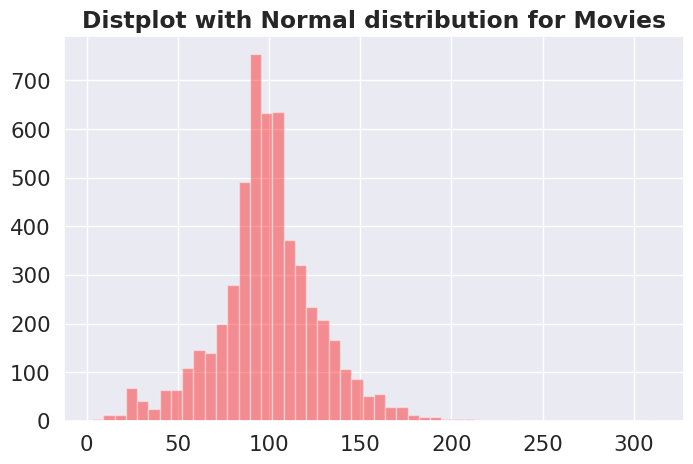

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(8,5))

#.str.extract('(\d+)') extracts the numerical values from the duration column using a regular expression.
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])

plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

Most of the movies have duration of between 50 to 150.

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

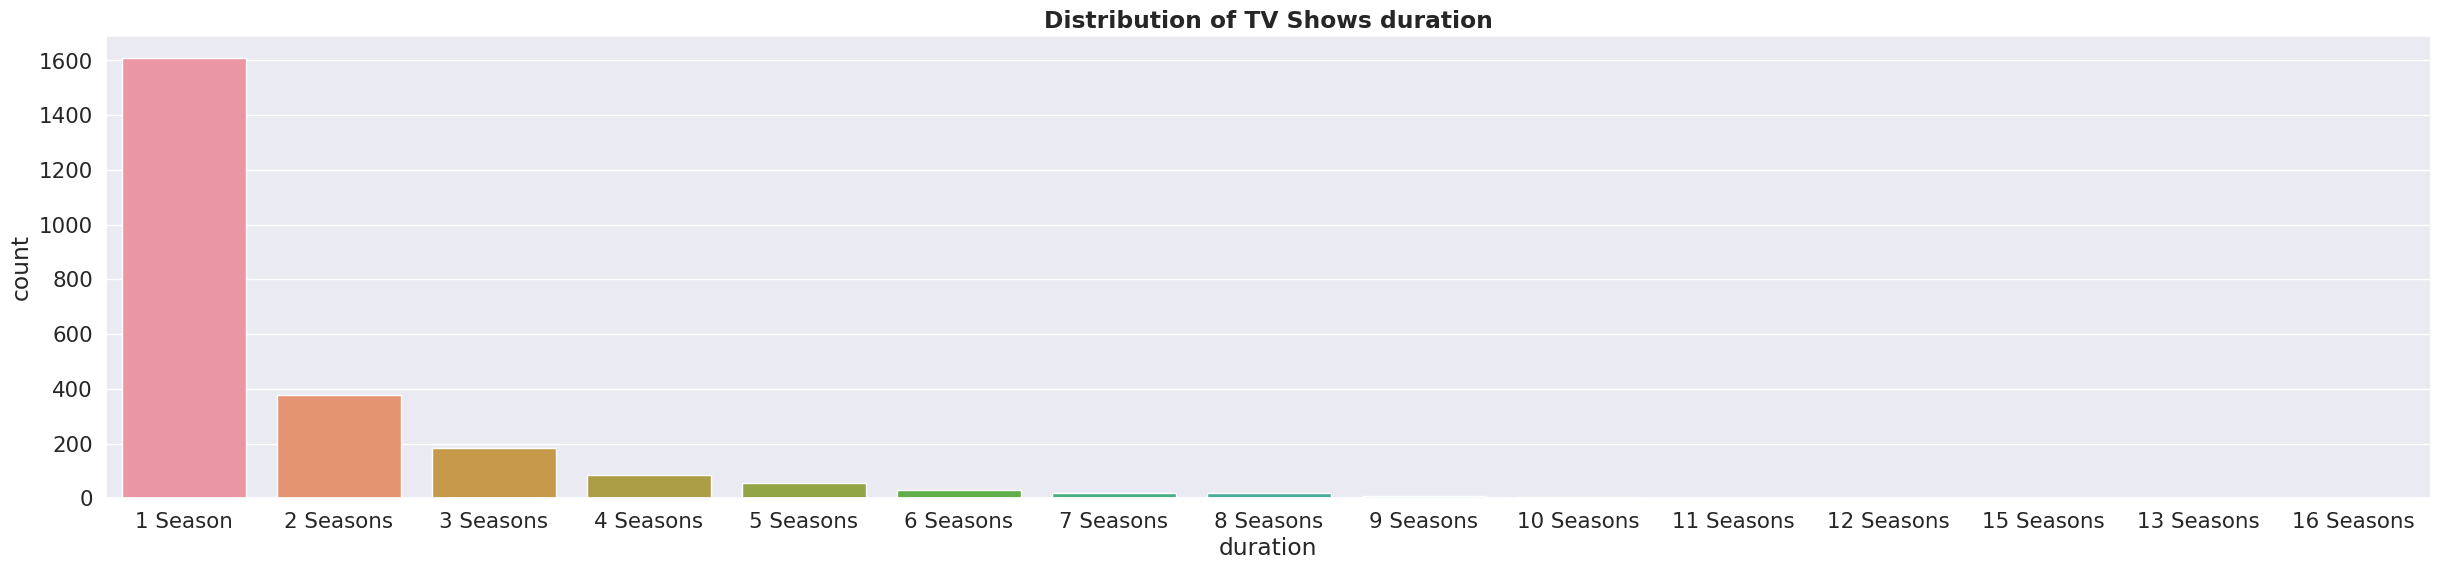

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


Highest number of tv_shows consistig of single season.

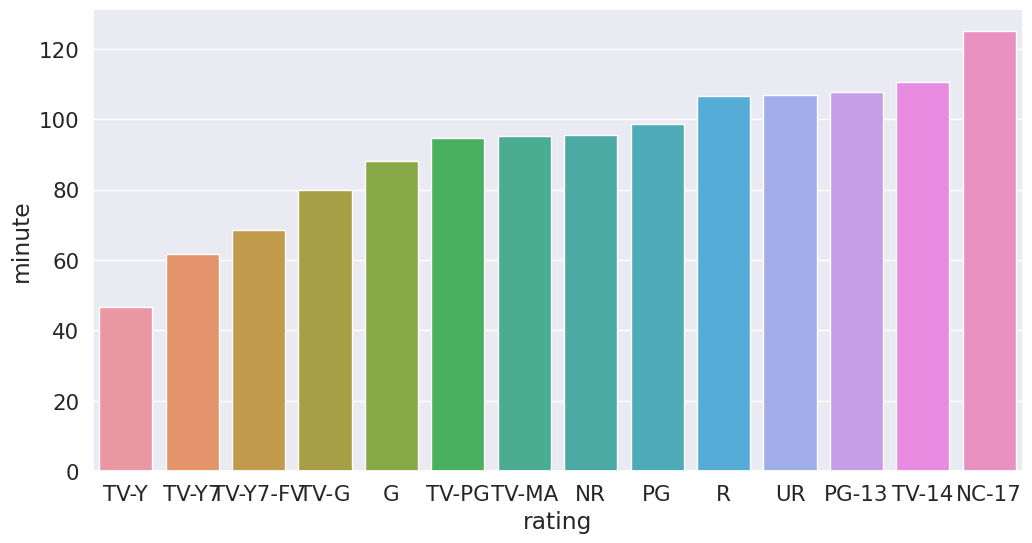

In [ ]:
# Which rating movie has Longest duration/runtime
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()

# Creating new Dataframe duration_df
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average

##**7.Country**

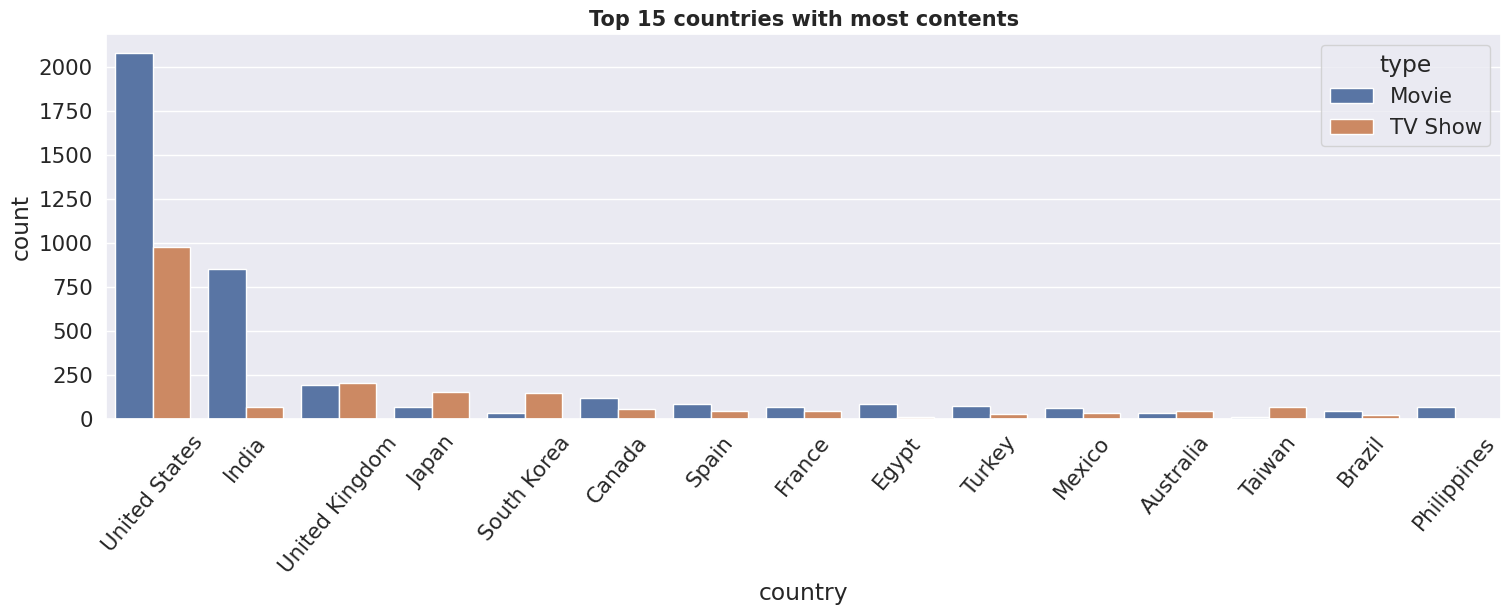

In [ ]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

1. US and India are top 2 countries where Netflix is popular.
2. United states has the highest number of content on the Netflix ,followed by india ( Movies are doubled or more than Tv shows)

3. But for UK and Japan Tv shows are more added on netflix than Movies.

<BarContainer object of 11 artists>

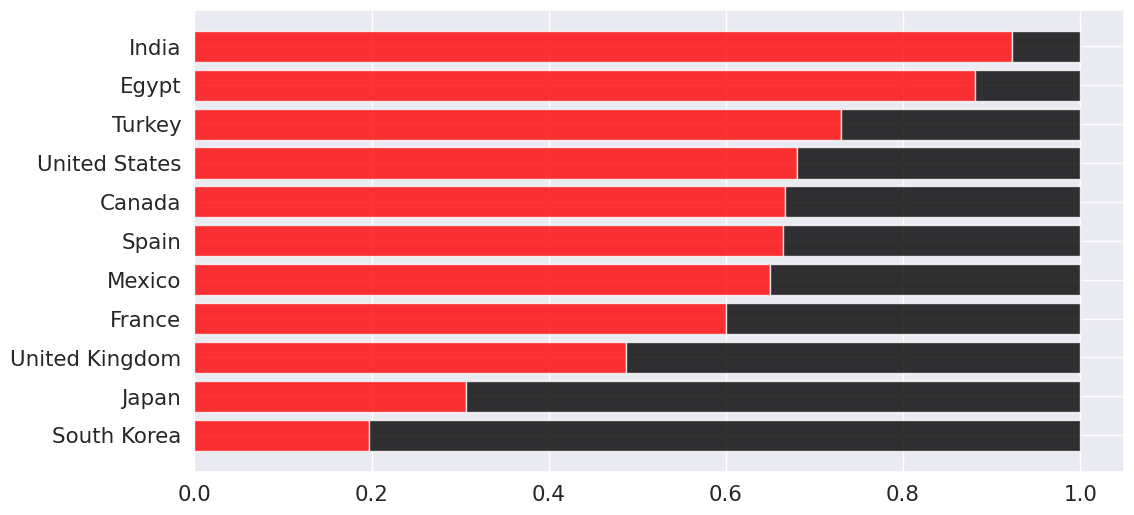

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

#calculates the total count of movies and TV shows for each country
content_data['sum'] = content_data.sum(axis=1)

'''(content_data.T / content_data['sum']).T calculates the ratio of movies and TV shows for each country, and then transposes the resulting dataframe.
[['Movie', 'TV Show']] selects only the columns that show the ratio of movies and TV shows.
.sort_values(by='Movie',ascending=False)[::-1] sorts the countries by the ratio of movies and TV shows in descending order,
 and then reverses the order so that the country with the highest ratio is at the top.'''
 
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='red', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

India has highest number of movies in netflix followed by Egypt, Turkey and US..

###Heatmap

In [ ]:
# Preparing data for heatmap

#adds a new column called count to the dataframe with the value of 1 for each row.
df['count'] = 1

data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]

# creates a new dataframe that shows the distribution of content ratings by country.
#The resulting dataframe is normalized by row (index), and then transposed to show the ratings as columns and the countries as rows.
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap



country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093434,0.089362
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204545,0.195090
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.14,0.382514,0.097015,0.189394,0.242881
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.77,0.469945,0.835821,0.512626,0.472668


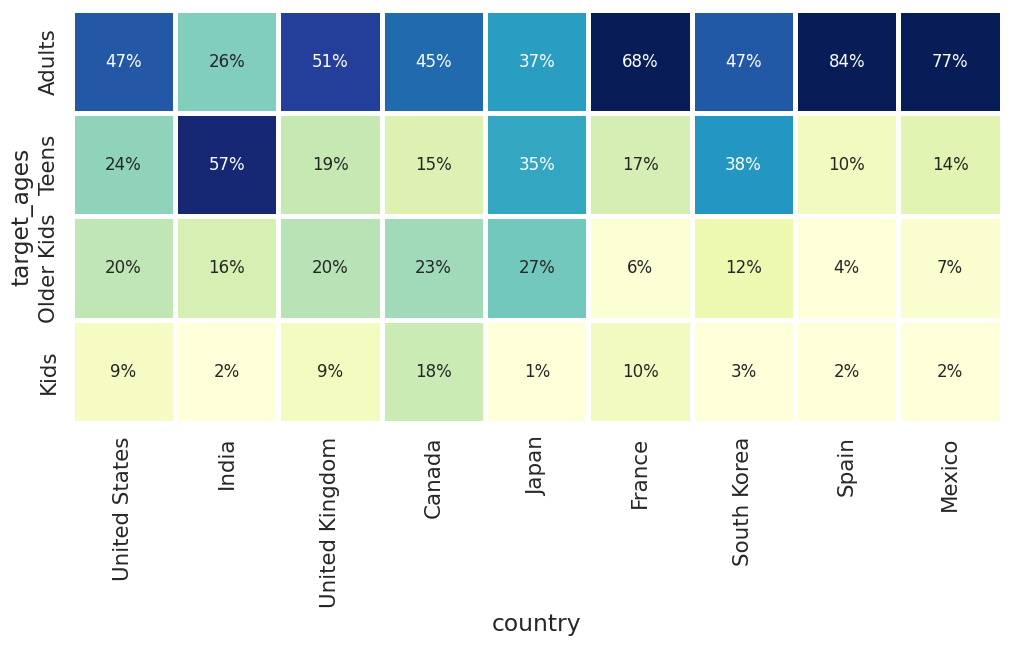

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

1. In India Target age group is "Teens" for netflix who watched more content than other traget age group.

2. But For US, UK, France , Spain the target age group is "Adult".
3. for Japan Teens and Adults are equally traget ages.



## **8.Originals**

In [ ]:
#On which Date the content added on Netflix compare to releasing of year.
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


1. Some movies and TV shows were actually released in the past and they were added 
later on Netflix.
2. But some movies and TV shows were released on Netflix itself, Named those as Netflix Originals.

([<matplotlib.patches.Wedge at 0x7fe679788430>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

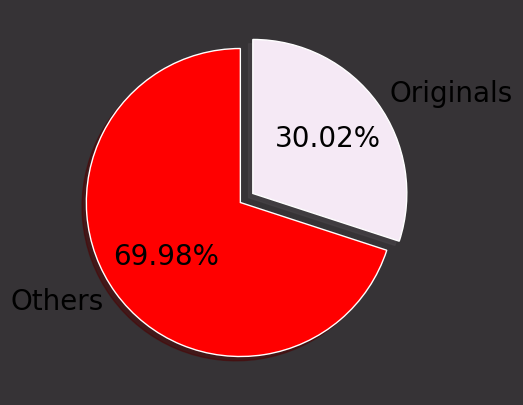

In [ ]:
# Netflix Originals movies and Other movies from different mode
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

1. 30% Movies released on Netflix.
2. 70% Movies added on Netflix were released earlier by different mode.

## **9.Directors**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

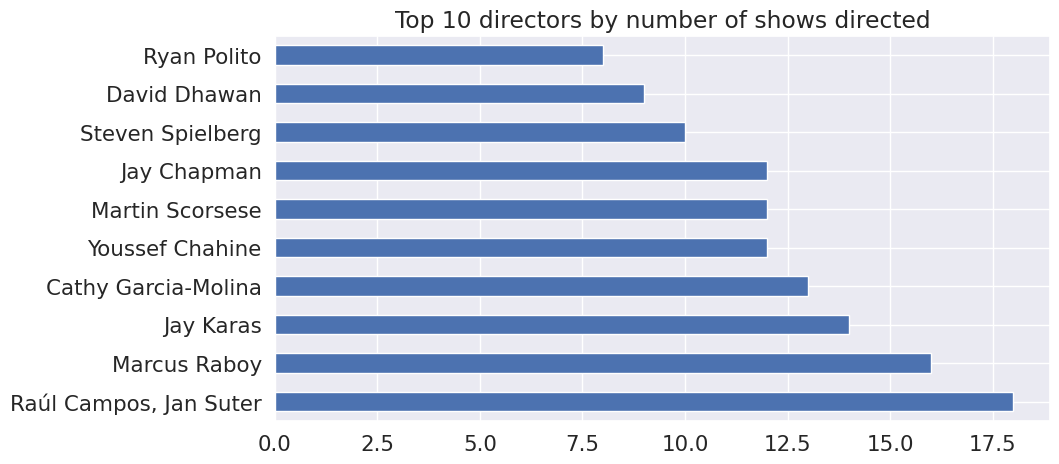

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, 'Top 10 TV show directors')

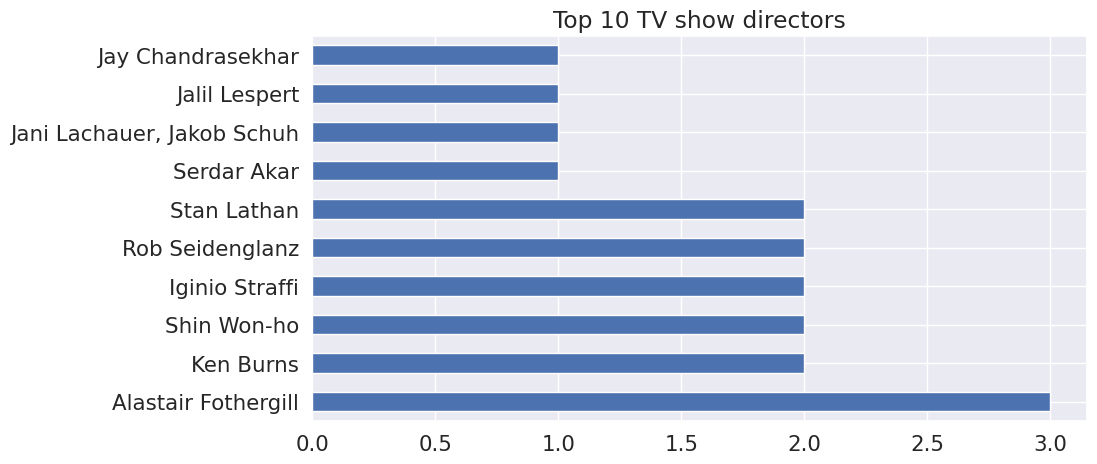

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

1. Alastair Fothergill has directed three TV shows, the most of any director.
2. Only six directors have directed more than one television show.

## NLP (Natural Language Processing)

In [ ]:
df.dtypes

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [ ]:
#Text Processing 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Changing the data type of column description in string
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7777, dtype: object

In [ ]:
# Description converting into a list of words 
df['description'] = df['description'].apply(lambda x: x.split(" "))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))

# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

### Removing the Punctuation


In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
# Seeing the sentences after removing the puctuation
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

### Removing the Stopwords

In [ ]:
# Using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

### Lemmatization


In [ ]:
# lEMMATIZATION = Process of reducing words to their meaningful Base Word 
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Lemmatization
df['description'] = lemmatize_verbs(df['description'])
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

## Vectorization

In [ ]:
# importing TfidVectorizer from sklearn library( Term Frequency Inverse Document Frequency.)
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape
     

(7777, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray() 

# clustering algorithms

**1.Kmean**

Finding the optimal number of clusters using the elbow method

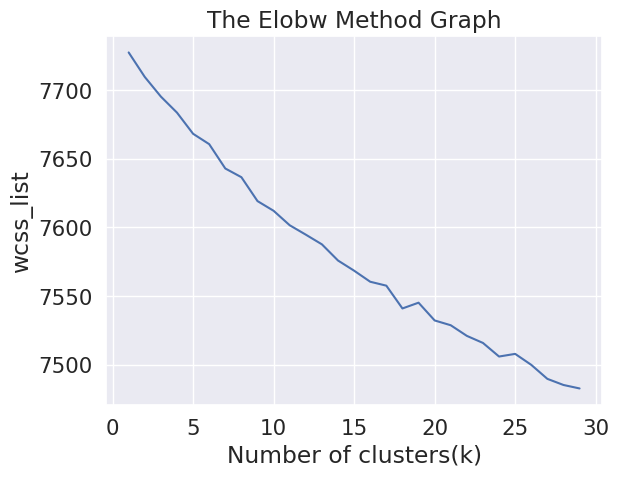

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0023
cluster: 5 	 Sillhoute: 0.0030
cluster: 6 	 Sillhoute: 0.0032
cluster: 7 	 Sillhoute: 0.0034
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0043
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0048
cluster: 12 	 Sillhoute: 0.0053
cluster: 13 	 Sillhoute: 0.0054
cluster: 14 	 Sillhoute: 0.0057
cluster: 15 	 Sillhoute: 0.0054
cluster: 16 	 Sillhoute: 0.0059
cluster: 17 	 Sillhoute: 0.0062
cluster: 18 	 Sillhoute: 0.0064
cluster: 19 	 Sillhoute: 0.0068
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0065
cluster: 23 	 Sillhoute: 0.0069
cluster: 24 	 Sillhoute: 0.0073
cluster: 25 	 Sillhoute: 0.0071
cluster: 26 	 Sillhoute: 0.0073
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0078
cluster: 29 	 Sillhoute: 0.0076


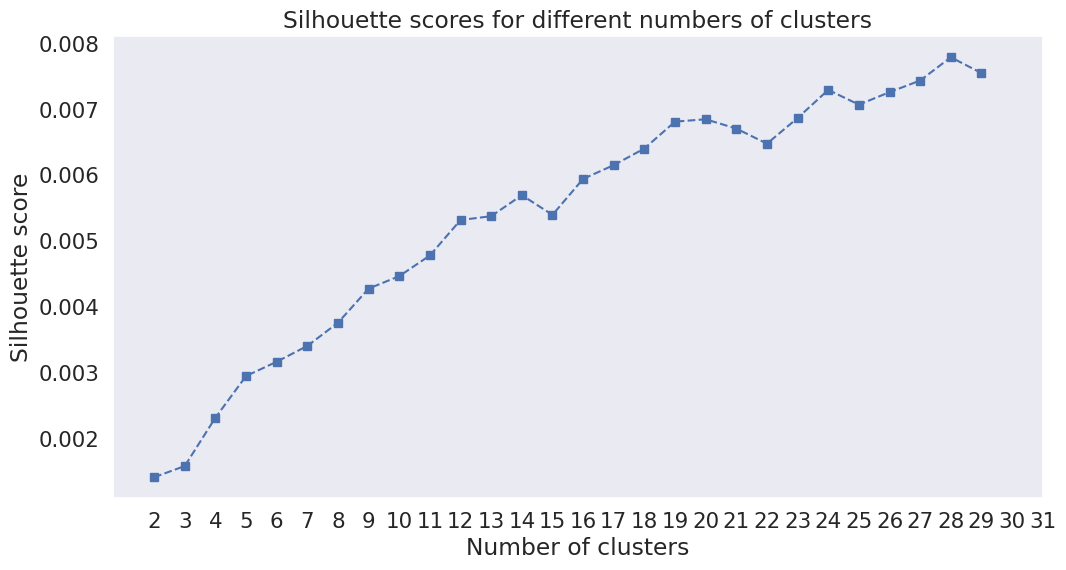

In [ ]:
# create a new figure with size (8, 6)
fig = plt.figure(figsize=(12, 6))

# plot the silhouette scores
plt.plot(sill, 'bs--')
plt.xticks(list(range(0,30)),list(range(2,32)))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for different numbers of clusters')

# show the plot
plt.show()


From elbow and sillhoute score ,forming 28 number of clusters

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 28, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

##**Evaluation**

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007152365267959305


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.0866411304135

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

6     2384
15     339
23     294
1      289
7      284
13     266
4      263
0      260
19     248
21     238
11     235
20     220
9      217
22     190
12     189
16     188
18     181
2      177
3      167
25     158
26     148
14     145
24     144
5      140
8      132
27     125
10      98
17      58
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

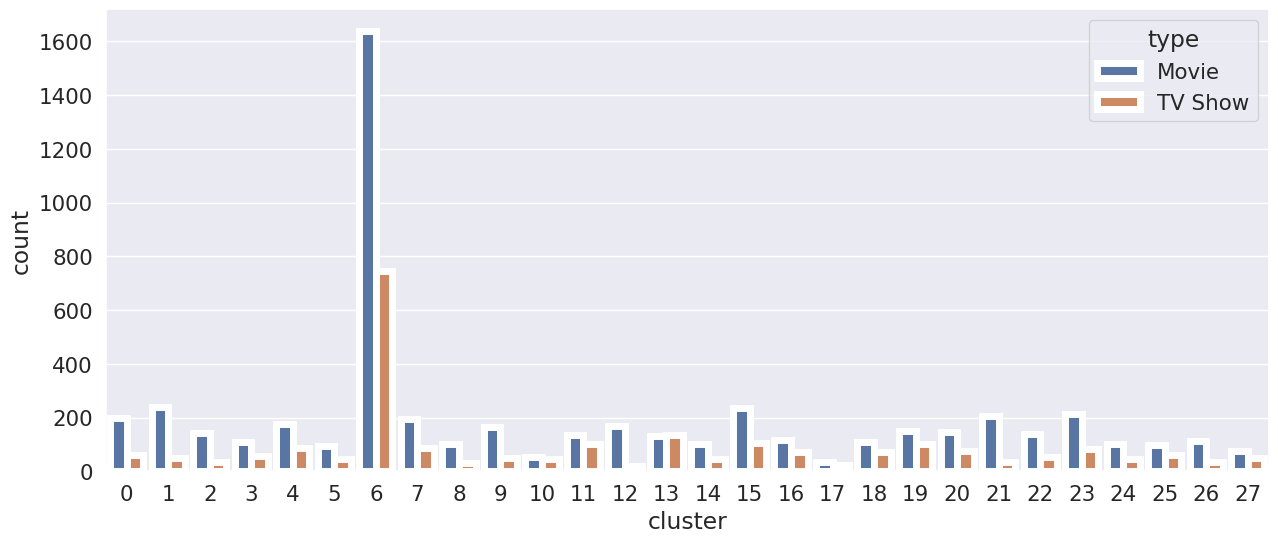

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

Cluster 6 has the highest number of datapoints

In [ ]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**dendogram**

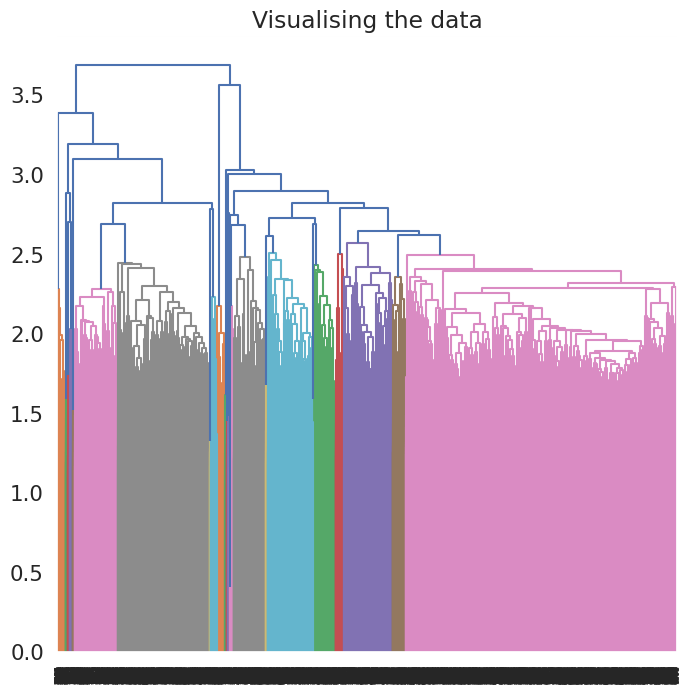

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

**2.AgglomerativeClustering**

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,0


**Evaluation**

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

14.959620384438814

# Conclusion


* From elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best for identification than Hierarchical clustering as the evaluation metrics also indicates the same, in kmean cluster 0 has the highest number of datapoints
and evnly distributed for other cluster.
* Netflix has 5377 movies and 2400 TV shows, There are more numbers of movies (69.14%) than TV shows (30.86%) in the dataset.

* TV-MA has the highest number of ratings for Movies and TV shows.
* Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.


* Highest number of movies released in 2017 and 2018
* Highest number of Tv Shows released in 2020
* The number of movies on Netflix is growing significantly faster than the number of TV shows.
* We saw a huge increase in the number of movies and television episodes after 2015.
* There is a significant drop in the number of Tv Shows/Movies after 2020(in year 2021), maybe due to covid.
* It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows
*  From October to January, maximum number of movies and TV shows were added on netflix.

* Documentaries are the top most Movie genre in netflix followed by standup comedy and Drams and international movies.

* kids tv is the top most TV show genre in netflix.

* Most of the movies have duration of between 50 to 150

* Highest number of tv_shows consistig of single season

* US and India are top 2 countries where Netflix is popular.

* United states has the highest number of content on the Netflix ,followed by india ( Movies are doubled or more than Tv shows)

* But for UK and Japan Tv shows are more added on netflix than Movies.
* India has highest number of movies in netflix followed by Egypt, Turkey and US.
* In India Target age group is "Teens" for netflix who watched more content than other traget age group.

* But For US, UK, France , Spain the target age group is "Adult".

* for Japan Teens and Adults are equally traget ages.
* Those movies that have a rating of NC-17 have the longest average duration.

* 30% movies released on Netflix, 70% movies added on Netflix were released earlier by different mode.

* Alastair Fothergill has directed three TV shows, the most of any director.
* Only six directors have directed more than one television show.
